In [229]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------- ----------- 5.8/8.0 MB 32.0 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 31.1 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 42.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 30.3 MB/s eta 0:00:00
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
Note: you may need to restart the kernel to use updated packages.


In [116]:
import pandas as pd
import numpy as np
import math
from homeharvest import scrape_property
from datetime import datetime

In [225]:
allProperties = scrape_property(
    location = "Seattle, WA",
    listing_type = "for_rent",
    past_days = 365
)

In [226]:
allProperties

,property_url,property_id,listing_id,mls,mls_id,status,text,style,full_street_line,street,...,builder_id,builder_name,office_id,office_mls_set,office_name,office_email,office_phones,nearby_schools,primary_photo,alt_photos
0,https://www.realtor.com/rentals/details/1000-Q...,9388507782,2977613306,ZILL,3tbhj3u37w4g5,FOR_RENT,<NA>,APARTMENT,1000 Queen Anne Ave N,1000 Queen Anne Ave,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Seattle Public Schools,http://ar.rdcpix.com/7ec338d677a8a5e93608b71c9...,http://ar.rdcpix.com/7ec338d677a8a5e93608b71c9...
1,https://www.realtor.com/rentals/details/1800-4...,2045697942,2977600988,RENU,r3813091,FOR_RENT,"For interested prospects, please provide a mob...",TOWNHOMES,1800 43rd Ave E Apt 301,1800 43rd Ave,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Seattle Public Schools,http://ap.rdcpix.com/b6af8553dff472576e5b64ebf...,http://ap.rdcpix.com/b6af8553dff472576e5b64ebf...
2,https://www.realtor.com/rentals/details/2111-W...,2796743275,2977598979,ZUMU,60419377,FOR_RENT,"For interested prospects, please provide a mob...",CONDOS,2111 Waverly Pl N Apt 201,2111 Waverly Pl,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Seattle Public Schools,http://ap.rdcpix.com/5b00b24925359d7c97a70c2b1...,http://ap.rdcpix.com/5b00b24925359d7c97a70c2b1...
3,https://www.realtor.com/rentals/details/626-4t...,1189690439,2977587231,SEWA,2326148,FOR_RENT,Special Temporary reduced Rent for 12 months! ...,CONDOS,626 4th Ave W Apt 201,626 4th Ave,...,<NA>,<NA>,1120776,O-SEWA-5377,Windermere PM/Lori Gill Assoc.,anthony@purekaratcreations.com,"[{'number': '4254555515', 'type': 'Office', 'p...",Seattle Public Schools,http://ap.rdcpix.com/19aab43c5c5e63a84004982fb...,http://ap.rdcpix.com/19aab43c5c5e63a84004982fb...
4,https://www.realtor.com/rentals/details/SW-Bea...,9584627620,2977572674,ZUMU,60413105,FOR_RENT,Experience waterfront living at its finest in ...,APARTMENT,SW Beach Drive Ter Unit 1043421P,SW Beach Drive Ter,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,http://ap.rdcpix.com/9511dd82af5794d387b81a6e2...,http://ap.rdcpix.com/9511dd82af5794d387b81a6e2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,https://www.realtor.com/rentals/details/165-17...,1396043702,2966261121,RLXB,890a70c2-58a1-11ee-80f0-02dcc31ee659,FOR_RENT,<NA>,APARTMENT,165 17th Ave,165 17th Ave,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"Summit Public School: Sierra, Seattle Public S...",http://ar.rdcpix.com/90c378ba47d8b66ab7a921dd8...,http://ar.rdcpix.com/90c378ba47d8b66ab7a921dd8...
1820,https://www.realtor.com/rentals/details/2418-N...,9761418095,2966245973,RLXB,b88b3ea6-69de-11ee-8ab6-12de4bf481cd,FOR_RENT,<NA>,APARTMENT,2418 NW 57th St,2418 NW 57th St,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Seattle Public Schools,http://ar.rdcpix.com/c3636525bed8825d4993aff68...,http://ar.rdcpix.com/c3636525bed8825d4993aff68...
1821,https://www.realtor.com/rentals/details/603-12...,2785018075,2966268560,RLXB,5b0c80e0-9466-11e8-ba21-1866dab9098f,FOR_RENT,<NA>,APARTMENT,603 12th Ave E,603 12th Ave,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"Seattle Central Community College, Seattle Pub...",http://ar.rdcpix.com/8d11fdeb1435100634bc8994b...,http://ar.rdcpix.com/8d11fdeb1435100634bc8994b...
1822,https://www.realtor.com/rentals/details/1510-2...,2814816034,2966252971,RLXB,620a7610-99b7-11ec-9463-061468efe32a,FOR_RENT,Available now is a room for rent with a privat...,APARTMENT,1510 23rd Ave,1510 23rd Ave,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Seattle Public Schools,http://ar.rdcpix.com/3e01889e02c7c217df96321a8...,http://ar.rdcpix.com/3e01889e02c7c217df96321a8...


In [21]:
# allProperties.columns

Index(['property_url', 'property_id', 'listing_id', 'mls', 'mls_id', 'status',
       'text', 'style', 'full_street_line', 'street', 'unit', 'city', 'state',
       'zip_code', 'beds', 'full_baths', 'half_baths', 'sqft', 'year_built',
       'days_on_mls', 'list_price', 'list_price_min', 'list_price_max',
       'list_date', 'sold_price', 'last_sold_date', 'assessed_value',
       'estimated_value', 'tax', 'tax_history', 'new_construction', 'lot_sqft',
       'price_per_sqft', 'latitude', 'longitude', 'neighborhoods', 'county',
       'fips_code', 'stories', 'hoa_fee', 'parking_garage', 'agent_id',
       'agent_name', 'agent_email', 'agent_phones', 'agent_mls_set',
       'agent_nrds_id', 'broker_id', 'broker_name', 'builder_id',
       'builder_name', 'office_id', 'office_mls_set', 'office_name',
       'office_email', 'office_phones', 'nearby_schools', 'primary_photo',
       'alt_photos'],
      dtype='object')

<Axes: >

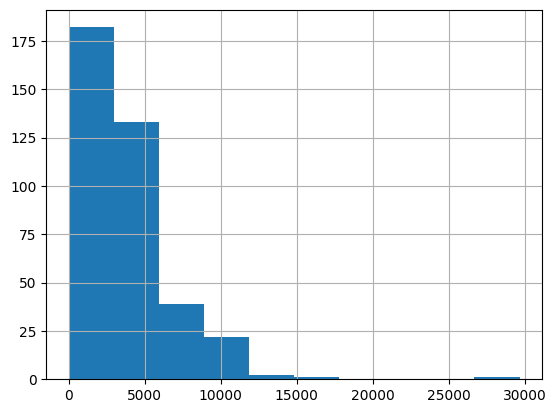

In [230]:
allProperties["list_price"].hist()

In [152]:
# properties[properties["list_price"]<=1500]
# properties = allProperties[allProperties["list_price"]<=2000]

In [153]:
# allProperties.to_csv("./allProperties.csv")
# properties.to_csv("./properties.csv")

In [231]:
properties = allProperties

In [232]:
# properties = pd.read_csv("./properties.csv")
# properties = properties.drop("Unnamed: 0", axis=1)
# properties

In [129]:
properties["full_street_line"]

2       9007 14th Ave SW Unit 1401
5            626 4th Ave W Apt 201
6         4752 41st Ave SW Apt 406
11                    2100 3rd Ave
22       2923 Franklin Ave E Apt 1
                   ...            
1642      4547 19th Ave NE Unit 15
1643      4547 19th Ave NE Unit 17
1647      4547 19th Ave NE Unit 18
1651        6402 14th Ave NW Apt 4
1652        450 S Main St Unit 610
Name: full_street_line, Length: 114, dtype: object

In [27]:
properties['latitude']

0       47.522545
1       47.625422
2       47.698290
3       47.543516
4       47.638164
          ...    
1817    47.616764
1818    47.566132
1819    47.627769
1820    47.607716
1821    47.578477
Name: latitude, Length: 1822, dtype: float64

In [100]:
metros_df = pd.read_csv("./metros.csv")
metros_df

,Station,X,Y
0,Angle Lake,47.423063,-122.297785
1,SeaTac,47.453710,-122.321791
2,Tukwila,47.460200,-122.240500
3,Rainier Beach,47.522611,-122.279361
4,Othello,47.537917,-122.281528
5,Columbia City,47.559440,-122.292500
6,Mount Baker,47.576583,-122.297694
7,Beacon Hill,47.579440,-122.311390
8,Sodo,47.581278,-122.327389
9,Stadium,47.591333,-122.327167


In [61]:
metros_df['X'] = metros_df['X'].astype(float)
metros_df['Y'] = metros_df['Y'].astype(float)

In [108]:
def closestMetro(prop_x,prop_y):
    mindist = 10000
    closestStation = ""
    for i in range(len(metros_df)):
        station_x = metros_df.iloc[i]['X']
        station_y = metros_df.iloc[i]['Y']
        dist = math.sqrt((prop_x-station_x)**2 + (prop_y-station_y)**2)
        if(dist<mindist):
            closestStation = metros_df.iloc[i]['Station']
            mindist = dist
    return closestStation

In [69]:
closestMetro(47.81564, -122.29473)

'Lynnwood City Center'

In [70]:
amazon_x = 47.6224589
amazon_y = -122.3420546

In [71]:
closestMetro(amazon_x, amazon_y)

'Westlake'

In [73]:
parks_df = pd.read_csv("Seattle_Parks.csv")
parks_df

,PMAID,LocID,Name,Address,ZIP Code,X Coord,Y Coord,Location 1
0,281,2545,12th and Howe Play Park,1200 W Howe St,98119,-122.372985,47.636097,"(47.636097, -122.372985)"
1,4159,2387,12th Ave S Viewpoint,2821 12TH Ave S,98144,-122.317765,47.577953,"(47.577953, -122.317765)"
2,4467,2382,12th Ave Square Park,564 12th Ave,98122,-122.316455,47.607427,"(47.607427, -122.316455)"
3,4010,2546,14th Ave NW Boat Ramp,4400 14th Ave NW,98107,-122.373536,47.660775,"(47.660775, -122.373536)"
4,296,296,3001 E Madison,3001 E Madison St,98112,-122.293173,47.625169,"(47.625169, -122.293173)"
...,...,...,...,...,...,...,...,...
407,1000292,292,Woodland Park Rose Garden,750 N 50th St,98103,-122.350540,47.666499,"(47.666499, -122.35054)"
408,200,9909,Woodland Park Zoo,700 N 50th St,98103,-122.350430,47.666183,"(47.666183, -122.35043)"
409,4563,0,Yesler Playfield,835 Yesler Way,98104,-122.320083,47.601262,"(47.601262, -122.320083)"
410,580,1712,York Park,3650 Renton Ave S,98144,-122.295537,47.570461,"(47.570461, -122.295537)"


In [95]:
def closestPark(prop_x,prop_y):
    mindist = 1000000000
    closestPark = ""
    for i in range(len(parks_df)):
        park_x = parks_df.iloc[i]['Y Coord']
        park_y = parks_df.iloc[i]['X Coord']
        dist = math.sqrt((prop_x-park_x)**2 + (prop_y-park_y)**2)
        if(dist<mindist):
            closestPark = parks_df.iloc[i]['Name']
            mindist = dist
    return closestPark

In [96]:
closestPark(amazon_x, amazon_y)

'Denny Park'

In [101]:
closestPark(47.815640, -122.294730)

'Little Brook Park'

In [107]:
parking_df = pd.read_csv("./Seattle_Paid_Parking.csv")
parking_df = parking_df.drop_duplicates(subset=["Blockface Name"])
parking_df

,Transaction ID,Meter Code,Transaction DateTime,Payment Mean,Amount Paid,Duration In Minutes,Blockface Name,Side Of Street,Element key,Parking Space Number,Latitude,Longitude
0,1435796120,11107004,01/18/2025 08:00:00 AM,PHONE,7.00,240,22ND AVE NW BETWEEN SHILSHOLE AVE NW AND BALLA...,E,3338,NaN,47.667116,-122.384658
1,1435775536,1016002,01/18/2025 08:00:00 AM,PHONE,2.00,120,S KING ST BETWEEN 2ND AVE S AND 3RD AVE S,N,88629,NaN,47.598360,-122.330979
2,1435778215,10021002,01/18/2025 08:00:00 AM,PHONE,2.00,120,2ND AVE BETWEEN LENORA ST AND BLANCHARD ST,NE,70750,NaN,47.612933,-122.343616
3,1435784261,4042002,01/18/2025 08:00:00 AM,PHONE,2.00,120,MADISON ST BETWEEN 4TH AVE AND 5TH AVE,SE,79570,NaN,47.606274,-122.332304
4,1435787480,15117002,01/18/2025 08:00:00 AM,PHONE,0.25,10,NE 72ND ST BETWEEN WOODLAWN AVE NE AND 5TH AVE NE,N,85385,NaN,47.680760,-122.323774
...,...,...,...,...,...,...,...,...,...,...,...,...
94519,1437090112,4708030,01/23/2025 01:00:00 PM,PHONE,1.00,30,4TH AVE BETWEEN SPRING ST AND SENECA ST,NE,6186,NaN,47.607198,-122.333805
96764,1437119521,5703030,01/23/2025 02:06:00 PM,PHONE,1.00,30,SENECA ST BETWEEN 4TH AVE AND 5TH AVE,SE,35426,NaN,47.607695,-122.333613
107973,1436987461,4705030,01/23/2025 09:03:00 AM,PHONE,0.50,15,6TH AVE BETWEEN MARION ST AND MADISON ST,SW,75773,NaN,47.606601,-122.330454
115294,1437368597,21706030,01/24/2025 10:31:00 AM,PHONE,1.00,30,VIRGINIA ST BETWEEN TERRY AVE AND FAIRVIEW AVE,NW,81305,NaN,47.617360,-122.334637


In [113]:
def closestParking(prop_x,prop_y):
    mindist = 1000000000
    closestParking = ""
    for i in range(len(parking_df)):
        parking_x = parking_df.iloc[i]['Latitude']
        parking_y = parking_df.iloc[i]['Longitude']
        dist = math.sqrt((prop_x-parking_x)**2 + (prop_y-parking_y)**2)
        if(dist<mindist):
            closestParking = parking_df.iloc[i]['Blockface Name']
            mindist = dist
    return closestParkings

In [114]:
closestParking(amazon_x, amazon_y)

'DEXTER AVE N BETWEEN HARRISON ST AND REPUBLICAN ST'

In [234]:
properties['closestMetro'] = ""
properties['closestPark'] = ""
properties['closestParking'] = ""

In [235]:
for i in range(len(properties)):
    prop_x = properties.iloc[i]['latitude']
    prop_y = properties.iloc[i]['longitude']
    properties['closestMetro'].iloc[i] = closestMetro(prop_x, prop_y)
    properties['closestPark'].iloc[i] = closestPark(prop_x, prop_y)
    properties['closestParking'].iloc[i] = closestParking(prop_x, prop_y)

C:\Users\smeet\AppData\Local\Temp\ipykernel_11364\1955672770.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  properties['closestMetro'].iloc[i] = closestMetro(prop_x, prop_y)
C:\Users\smeet\AppData\Local\Temp\ipykernel_11364\1955672770.p

In [155]:
properties['neighborhood'] = properties['neighborhoods']

In [200]:
for i in range(len(properties)):
    properties['neighborhood'].iloc[i] = str(properties['neighborhoods'].iloc[i]).split(",")[0]

C:\Users\smeet\AppData\Local\Temp\ipykernel_11364\2630142855.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  properties['neighborhood'].iloc[i] = str(properties['neighborhoods'].iloc[i]).split(",")[0]
C:\Users\smeet\AppData\Local\Temp\ip

In [236]:
properties

,property_url,property_id,listing_id,mls,mls_id,status,text,style,full_street_line,street,...,office_mls_set,office_name,office_email,office_phones,nearby_schools,primary_photo,alt_photos,closestMetro,closestPark,closestParking
0,https://www.realtor.com/rentals/details/1000-Q...,9388507782,2977613306,ZILL,3tbhj3u37w4g5,FOR_RENT,<NA>,APARTMENT,1000 Queen Anne Ave N,1000 Queen Anne Ave,...,<NA>,<NA>,<NA>,<NA>,Seattle Public Schools,http://ar.rdcpix.com/7ec338d677a8a5e93608b71c9...,http://ar.rdcpix.com/7ec338d677a8a5e93608b71c9...,Westlake,Highland Place,W ROY ST BETWEEN QUEEN ANNE AVE N AND 1ST AVE W
1,https://www.realtor.com/rentals/details/1800-4...,2045697942,2977600988,RENU,r3813091,FOR_RENT,"For interested prospects, please provide a mob...",TOWNHOMES,1800 43rd Ave E Apt 301,1800 43rd Ave,...,<NA>,<NA>,<NA>,<NA>,Seattle Public Schools,http://ap.rdcpix.com/b6af8553dff472576e5b64ebf...,http://ap.rdcpix.com/b6af8553dff472576e5b64ebf...,University of Washington,Madison Park,E REPUBLICAN ST BETWEEN 15TH N AVE E AND 16TH ...
2,https://www.realtor.com/rentals/details/2111-W...,2796743275,2977598979,ZUMU,60419377,FOR_RENT,"For interested prospects, please provide a mob...",CONDOS,2111 Waverly Pl N Apt 201,2111 Waverly Pl,...,<NA>,<NA>,<NA>,<NA>,Seattle Public Schools,http://ap.rdcpix.com/5b00b24925359d7c97a70c2b1...,http://ap.rdcpix.com/5b00b24925359d7c97a70c2b1...,Westlake,Thomas C. Wales Park,WESTLAKE EAST RDWY AVE N BETWEEN CROCKETT ST A...
3,https://www.realtor.com/rentals/details/626-4t...,1189690439,2977587231,SEWA,2326148,FOR_RENT,Special Temporary reduced Rent for 12 months! ...,CONDOS,626 4th Ave W Apt 201,626 4th Ave,...,O-SEWA-5377,Windermere PM/Lori Gill Assoc.,anthony@purekaratcreations.com,"[{'number': '4254555515', 'type': 'Office', 'p...",Seattle Public Schools,http://ap.rdcpix.com/19aab43c5c5e63a84004982fb...,http://ap.rdcpix.com/19aab43c5c5e63a84004982fb...,Westlake,Blaine Place,3RD AVE W BETWEEN W MERCER ST AND W ROY ST
4,https://www.realtor.com/rentals/details/SW-Bea...,9584627620,2977572674,ZUMU,60413105,FOR_RENT,Experience waterfront living at its finest in ...,APARTMENT,SW Beach Drive Ter Unit 1043421P,SW Beach Drive Ter,...,<NA>,<NA>,<NA>,<NA>,<NA>,http://ap.rdcpix.com/9511dd82af5794d387b81a6e2...,http://ap.rdcpix.com/9511dd82af5794d387b81a6e2...,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,https://www.realtor.com/rentals/details/165-17...,1396043702,2966261121,RLXB,890a70c2-58a1-11ee-80f0-02dcc31ee659,FOR_RENT,<NA>,APARTMENT,165 17th Ave,165 17th Ave,...,<NA>,<NA>,<NA>,<NA>,"Summit Public School: Sierra, Seattle Public S...",http://ar.rdcpix.com/90c378ba47d8b66ab7a921dd8...,http://ar.rdcpix.com/90c378ba47d8b66ab7a921dd8...,Internationa District,Pratt Park,E JEFFERSON ST BETWEEN 17TH AVE AND 18TH AVE
1820,https://www.realtor.com/rentals/details/2418-N...,9761418095,2966245973,RLXB,b88b3ea6-69de-11ee-8ab6-12de4bf481cd,FOR_RENT,<NA>,APARTMENT,2418 NW 57th St,2418 NW 57th St,...,<NA>,<NA>,<NA>,<NA>,Seattle Public Schools,http://ar.rdcpix.com/c3636525bed8825d4993aff68...,http://ar.rdcpix.com/c3636525bed8825d4993aff68...,Northgate,Ballard Commons Park,24TH AVE NW BETWEEN NW 57TH ST AND NW 58TH ST
1821,https://www.realtor.com/rentals/details/603-12...,2785018075,2966268560,RLXB,5b0c80e0-9466-11e8-ba21-1866dab9098f,FOR_RENT,<NA>,APARTMENT,603 12th Ave E,603 12th Ave,...,<NA>,<NA>,<NA>,<NA>,"Seattle Central Community College, Seattle Pub...",http://ar.rdcpix.com/8d11fdeb1435100634bc8994b...,http://ar.rdcpix.com/8d11fdeb1435100634bc8994b...,Capitol Hill,Williams Place,E MERCER ST BETWEEN BROADWAY E AND 10TH AVE E
1822,https://www.realtor.com/rentals/details/1510-2...,2814816034,2966252971,RLXB,620a7610-99b7-11ec-9463-061468efe32a,FOR_RENT,Available now is a room for rent with a privat...,APARTMENT,1510 23rd Ave,1510 23rd Ave,...,<NA>,<NA>,<NA>,<NA>,Seattle Public Schools,http://ar.rdcpix.com/3e01889e02c7c217df96321a8...,http://ar.rdcpix.com/3e01889e02c7c217df96321a8.

In [238]:
properties.isna().sum()[0:20]

property_url           0
property_id            0
listing_id             0
mls                    0
mls_id                 0
status                 0
text                 457
style                  0
full_street_line       0
street                10
unit                1533
city                   0
state                  0
zip_code               0
beds                1445
full_baths          1457
half_baths          1760
sqft                1525
year_built          1452
days_on_mls            1
dtype: int64

In [239]:
properties.isna().sum()[20:40]

list_price          1444
list_price_min       382
list_price_max       382
list_date              0
sold_price          1030
last_sold_date      1028
assessed_value       929
estimated_value     1258
tax                  921
tax_history          921
new_construction       0
lot_sqft            1802
price_per_sqft      1525
latitude              97
longitude             97
neighborhoods        108
county                 0
fips_code             97
stories             1733
hoa_fee             1788
dtype: int64

In [240]:
properties.isna().sum()[40:62]

parking_garage    1804
agent_id          1762
agent_name        1722
agent_email       1778
agent_phones      1762
agent_mls_set     1722
agent_nrds_id     1818
broker_id         1799
broker_name       1796
builder_id        1824
builder_name      1824
office_id         1769
office_mls_set    1722
office_name       1722
office_email      1728
office_phones     1748
nearby_schools      97
primary_photo       70
alt_photos          70
closestMetro         0
closestPark          0
closestParking       0
dtype: int64

In [243]:
properties['list_price']

0       <NA>
1       2750
2       2800
3       1595
4       3480
        ... 
1819    <NA>
1820    <NA>
1821    <NA>
1822    <NA>
1823    <NA>
Name: list_price, Length: 1824, dtype: object

In [201]:
properties = properties.dropna(subset=["latitude", "longitude", "neighborhoods"])

In [202]:
properties.isna().sum()

property_url          0
property_id           0
listing_id            0
mls                   0
mls_id                0
status                0
text                  2
style                 0
full_street_line      0
street                0
unit                 22
city                  0
state                 0
zip_code              0
beds                  1
full_baths            4
half_baths          110
sqft                 14
year_built           81
days_on_mls           0
list_price            0
list_price_min      110
list_price_max      110
list_date             0
sold_price           84
last_sold_date       82
assessed_value       84
estimated_value      80
tax                  82
tax_history          82
new_construction      0
lot_sqft            108
price_per_sqft       14
latitude              0
longitude             0
neighborhoods         0
county                0
fips_code             0
stories              97
hoa_fee             106
parking_garage      107
agent_id        

In [165]:
properties.to_csv("./properties.csv")

In [166]:
properties

,property_url,property_id,listing_id,mls,mls_id,status,text,style,full_street_line,street,...,builder_name,office_id,office_mls_set,office_name,office_email,office_phones,nearby_schools,primary_photo,alt_photos,neighborhood
0,https://www.realtor.com/rentals/details/9007-1...,9685716998,2977602720,ZUMU,60119127,FOR_RENT,Introducing a modern townhouse located at 1401...,TOWNHOMES,9007 14th Ave SW Unit 1401,9007 14th Ave,...,NaN,NaN,NaN,NaN,NaN,NaN,South Seattle Community College (Cc District #...,http://ap.rdcpix.com/93c9ddee08b58eac6af6ea719...,http://ap.rdcpix.com/93c9ddee08b58eac6af6ea719...,Highland Park
1,https://www.realtor.com/rentals/details/626-4t...,1189690439,2977587231,SEWA,2326148,FOR_RENT,Special Temporary reduced Rent for 12 months! ...,CONDOS,626 4th Ave W Apt 201,626 4th Ave,...,NaN,1120776.0,O-SEWA-5377,Windermere PM/Lori Gill Assoc.,anthony@purekaratcreations.com,"[{'number': '4254555515', 'type': 'Office', 'p...",Seattle Public Schools,http://ap.rdcpix.com/19aab43c5c5e63a84004982fb...,http://ap.rdcpix.com/19aab43c5c5e63a84004982fb...,Kinnear Park
2,https://www.realtor.com/rentals/details/2100-3...,2026249615,2977553442,ZUMU,58720002,FOR_RENT,Downtown urban living! Incredible location wit...,CONDOS,2100 3rd Ave,2100 3rd Ave,...,NaN,NaN,NaN,NaN,NaN,NaN,Seattle Public Schools,http://ap.rdcpix.com/e11476c330d317cfc07ec1d62...,http://ap.rdcpix.com/e11476c330d317cfc07ec1d62...,Downtown Seattle
3,https://www.realtor.com/rentals/details/4752-4...,2327136058,2977572986,SEWA,2325899,FOR_RENT,Live in desirable and vibrant West Seattle! Lo...,CONDOS,4752 41st Ave SW Apt 406,4752 41st Ave,...,NaN,4435756.0,O-SEWA-7006,Pointe3 Real Estate LLC,experts@pointe3.com,"[{'number': '2062172217', 'type': 'Office', 'p...",South Seattle Community College (Cc District #...,http://ap.rdcpix.com/061fbfaf6a73af60c2a28491d...,http://ap.rdcpix.com/061fbfaf6a73af60c2a28491d...,West Seattle
4,https://www.realtor.com/rentals/details/2923-F...,9116095006,2977538873,AVAL,61271973,FOR_RENT,Welcome to 2923 Franklin Ave E Apt 1! This cha...,APARTMENT,2923 Franklin Ave E Apt 1,2923 Franklin Ave,...,NaN,NaN,NaN,NaN,NaN,NaN,"University Of Washington (17904), Seattle Publ...",http://ap.rdcpix.com/4b4494ac126cc7f07552b54e8...,http://ap.rdcpix.com/4b4494ac126cc7f07552b54e8...,Cascade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,https://www.realtor.com/rentals/details/408-Au...,9392331204,2970563379,ZUMU,58680150,FOR_RENT,We offer custom pricing for any duration. Rate...,APARTMENT,408 Aurora Ave N Unit 74,408 Aurora Ave,...,NaN,NaN,NaN,NaN,NaN,NaN,Seattle Public Schools,http://ap.rdcpix.com/573aa8e4c0796e5711ac693ec...,http://ap.rdcpix.com/573aa8e4c0796e5711ac693ec...,Cascade
110,https://www.realtor.com/rentals/details/2324-1...,9541735857,2970563907,ZUMU,58679729,FOR_RENT,We offer custom pricing for any duration. Rate...,APARTMENT,2324 1st Ave Unit 677,2324 1st Ave,...,NaN,NaN,NaN,NaN,NaN,NaN,Seattle Public Schools,http://ap.rdcpix.com/8791f62c81daf82507c5bd291...,http://ap.rdcpix.com/8791f62c81daf82507c5bd291...,Downtown Seattle
111,https://www.realtor.com/rentals/details/1200-E...,9175724276,2970294015,ZUMU,58102274,FOR_RENT,Located in the heart of Capitol Hill Beryl's p...,APARTMENT,1200 E Pike St,1200 E Pike St,...,NaN,NaN,NaN,NaN,NaN,NaN,"Seattle Central Community College, Seattle Pub...",http://ap.rdcpix.com/d4734488596b3ca5d9db44808...,http://ap.rdcpix.com/d4734488596b3ca5d9db44808...,Capitol Hill
112,https://www.realtor.com/rentals/details/12549-...,9897618405,2970249001,AVAL,61150634,FOR_RENT,Address: 12549 28th Ave NE Seattle WA 98125 Un...,APARTMENT,12549 28th Ave NE Apt 209,12549 28th Ave,...,NaN,NaN,NaN,NaN,NaN,NaN,Seattle Public Schools,http://ap.rdcpix.com/44f7fd273ae473ebf19807e24...,http://ap.rdcpix.com/44f7fd273ae473ebf19807e24...,Lake City


In [215]:
crime_df = pd.read_csv("crime.csv")  # Replaces bad chars
crime_df

,Neighborhood,Property Crime,Violent Crime,zip
0,ALASKA JUNCTION,697,81,98116
1,ALASKA JUNCTION,697,81,98126
2,ALKI,169,25,98116
3,BALLARD NORTH,810,60,98107
4,BALLARD SOUTH,1842,132,98107
...,...,...,...,...
77,SOUTH DELRIDGE,228,30,98106
78,SOUTH DELRIDGE,228,30,98126
79,SOUTH PARK,188,236,98108
80,UNIVERSITY,1942,52,98105


In [249]:
crime_avg_df = crime_df.groupby('zip', as_index=False).agg({
    'Property Crime': 'mean',
    'Violent Crime': 'mean'
})

# Rename columns for clarity
crime_avg_df.rename(columns={'Property Crime': 'Avg Property Crime', 'Violent Crime': 'Avg Violent Crime'}, inplace=True)

crime_avg_df


,zip,Avg Property Crime,Avg Violent Crime
0,98101,1362.000000,3.000000
1,98102,1070.666667,167.666667
2,98103,666.000000,30.750000
3,98104,921.750000,76.250000
4,98105,1919.000000,74.000000
5,98106,297.333333,100.000000
6,98107,1162.333333,70.666667
7,98108,255.333333,113.000000
8,98109,1513.000000,68.666667
9,98112,859.250000,135.500000


In [255]:
for i in range(len(properties)):
    propCrime = crime_avg_df[crime_avg_df['zip'] == int(properties.iloc[i]['zip_code'])]['Avg Property Crime']
    properties.loc[i, 'Property Crime'] = float(str(propCrime.iloc[0]).replace(",", "")) if len(propCrime)>0 else np.nan
    violCrime = crime_avg_df[crime_avg_df['zip'] == int(properties.iloc[i]['zip_code'])]['Avg Violent Crime']
    properties.loc[i, 'Violent Crime'] = float(str(violCrime.iloc[0]).replace(",", "")) if len(violCrime)>0  else np.nan

In [254]:
crime_avg_df[crime_avg_df['zip'] == int(properties.iloc[6]['zip_code'])]['Avg Property Crime']

2    666.0
Name: Avg Property Crime, dtype: float64

In [251]:
properties.iloc[6]['zip_code']

'98103'

In [253]:
crime_avg_df[crime_avg_df['zip'] == '98103']

,zip,Avg Property Crime,Avg Violent Crime


In [256]:
properties

,property_url,property_id,listing_id,mls,mls_id,status,text,style,full_street_line,street,...,office_email,office_phones,nearby_schools,primary_photo,alt_photos,closestMetro,closestPark,closestParking,Property Crime,Violent Crime
0,https://www.realtor.com/rentals/details/1000-Q...,9388507782,2977613306,ZILL,3tbhj3u37w4g5,FOR_RENT,<NA>,APARTMENT,1000 Queen Anne Ave N,1000 Queen Anne Ave,...,<NA>,<NA>,Seattle Public Schools,http://ar.rdcpix.com/7ec338d677a8a5e93608b71c9...,http://ar.rdcpix.com/7ec338d677a8a5e93608b71c9...,Westlake,Highland Place,W ROY ST BETWEEN QUEEN ANNE AVE N AND 1ST AVE W,1513.000000,68.666667
1,https://www.realtor.com/rentals/details/1800-4...,2045697942,2977600988,RENU,r3813091,FOR_RENT,"For interested prospects, please provide a mob...",TOWNHOMES,1800 43rd Ave E Apt 301,1800 43rd Ave,...,<NA>,<NA>,Seattle Public Schools,http://ap.rdcpix.com/b6af8553dff472576e5b64ebf...,http://ap.rdcpix.com/b6af8553dff472576e5b64ebf...,University of Washington,Madison Park,E REPUBLICAN ST BETWEEN 15TH N AVE E AND 16TH ...,859.250000,135.500000
2,https://www.realtor.com/rentals/details/2111-W...,2796743275,2977598979,ZUMU,60419377,FOR_RENT,"For interested prospects, please provide a mob...",CONDOS,2111 Waverly Pl N Apt 201,2111 Waverly Pl,...,<NA>,<NA>,Seattle Public Schools,http://ap.rdcpix.com/5b00b24925359d7c97a70c2b1...,http://ap.rdcpix.com/5b00b24925359d7c97a70c2b1...,Westlake,Thomas C. Wales Park,WESTLAKE EAST RDWY AVE N BETWEEN CROCKETT ST A...,1513.000000,68.666667
3,https://www.realtor.com/rentals/details/626-4t...,1189690439,2977587231,SEWA,2326148,FOR_RENT,Special Temporary reduced Rent for 12 months! ...,CONDOS,626 4th Ave W Apt 201,626 4th Ave,...,anthony@purekaratcreations.com,"[{'number': '4254555515', 'type': 'Office', 'p...",Seattle Public Schools,http://ap.rdcpix.com/19aab43c5c5e63a84004982fb...,http://ap.rdcpix.com/19aab43c5c5e63a84004982fb...,Westlake,Blaine Place,3RD AVE W BETWEEN W MERCER ST AND W ROY ST,2401.000000,114.000000
4,https://www.realtor.com/rentals/details/SW-Bea...,9584627620,2977572674,ZUMU,60413105,FOR_RENT,Experience waterfront living at its finest in ...,APARTMENT,SW Beach Drive Ter Unit 1043421P,SW Beach Drive Ter,...,<NA>,<NA>,<NA>,http://ap.rdcpix.com/9511dd82af5794d387b81a6e2...,http://ap.rdcpix.com/9511dd82af5794d387b81a6e2...,,,,377.500000,79.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,https://www.realtor.com/rentals/details/165-17...,1396043702,2966261121,RLXB,890a70c2-58a1-11ee-80f0-02dcc31ee659,FOR_RENT,<NA>,APARTMENT,165 17th Ave,165 17th Ave,...,<NA>,<NA>,"Summit Public School: Sierra, Seattle Public S...",http://ar.rdcpix.com/90c378ba47d8b66ab7a921dd8...,http://ar.rdcpix.com/90c378ba47d8b66ab7a921dd8...,Internationa District,Pratt Park,E JEFFERSON ST BETWEEN 17TH AVE AND 18TH AVE,1435.250000,175.000000
1820,https://www.realtor.com/rentals/details/2418-N...,9761418095,2966245973,RLXB,b88b3ea6-69de-11ee-8ab6-12de4bf481cd,FOR_RENT,<NA>,APARTMENT,2418 NW 57th St,2418 NW 57th St,...,<NA>,<NA>,Seattle Public Schools,http://ar.rdcpix.com/c3636525bed8825d4993aff68...,http://ar.rdcpix.com/c3636525bed8825d4993aff68...,Northgate,Ballard Commons Park,24TH AVE NW BETWEEN NW 57TH ST AND NW 58TH ST,1162.333333,70.666667
1821,https://www.realtor.com/rentals/details/603-12...,2785018075,2966268560,RLXB,5b0c80e0-9466-11e8-ba21-1866dab9098f,FOR_RENT,<NA>,APARTMENT,603 12th Ave E,603 12th Ave,...,<NA>,<NA>,"Seattle Central Community College, Seattle Pub...",http://ar.rdcpix.com/8d11fdeb1435100634bc8994b...,http://ar.rdcpix.com/8d11fdeb1435100634bc8994b...,Capitol Hill,Williams Place,E MERCER ST BETWEEN BROADWAY E AND 10TH AVE E,1070.666667,167.666667
1822,https://www.realtor.com/rentals/details/1510-2...,2814816034,2966252971,RLXB,620a7610-99b7-11ec-9463-061468efe32a,FOR_RENT,Available now is a room for rent with a privat...,APARTMENT,1510 23rd Ave,1510 23rd Ave,...,<NA>,<NA>,Seattle Public Schools,http://ar.rdcpix.com/3e01889e02c7c217df9

In [219]:
properties['zip_code']

0      98106
1      98119
2      98121
3      98116
4      98102
       ...  
105    98109
106    98121
107    98122
108    98125
109    98105
Name: zip_code, Length: 110, dtype: int64

In [ ]:
crime_df[crime_df['Neighborhood']

In [198]:
int(crime_df[crime_df['Neighborhood'].str.contains(properties.iloc[0]['neighborhood'], case=False, na=False)]['Property Crime'].iloc[0])

443

In [180]:
int(crime_df[crime_df['Neighborhood'].str.contains(properties.iloc[0]['neighborhood'], case=False, na=False)]['Violent Crime'].iloc[0])

32

In [176]:
crime_df[crime_df['Neighborhood'].str.contains(properties.iloc[0]['neighborhood'], case=False, na=False)]['Violent Crime'].iloc[0] +12

np.int64(44)

In [196]:
properties['Violent Crime'].isna().sum()

np.int64(76)

In [197]:
properties

,property_url,property_id,listing_id,mls,mls_id,status,text,style,full_street_line,street,...,office_mls_set,office_name,office_email,office_phones,nearby_schools,primary_photo,alt_photos,neighborhood,Property Crime,Violent Crime
0,https://www.realtor.com/rentals/details/9007-1...,9.685717e+09,2.977603e+09,ZUMU,60119127,FOR_RENT,Introducing a modern townhouse located at 1401...,TOWNHOMES,9007 14th Ave SW Unit 1401,9007 14th Ave,...,NaN,NaN,NaN,NaN,South Seattle Community College (Cc District #...,http://ap.rdcpix.com/93c9ddee08b58eac6af6ea719...,http://ap.rdcpix.com/93c9ddee08b58eac6af6ea719...,Highland Park,443.0,32.0
1,https://www.realtor.com/rentals/details/626-4t...,1.189690e+09,2.977587e+09,SEWA,2326148,FOR_RENT,Special Temporary reduced Rent for 12 months! ...,CONDOS,626 4th Ave W Apt 201,626 4th Ave,...,O-SEWA-5377,Windermere PM/Lori Gill Assoc.,anthony@purekaratcreations.com,"[{'number': '4254555515', 'type': 'Office', 'p...",Seattle Public Schools,http://ap.rdcpix.com/19aab43c5c5e63a84004982fb...,http://ap.rdcpix.com/19aab43c5c5e63a84004982fb...,Kinnear Park,NaN,NaN
2,https://www.realtor.com/rentals/details/2100-3...,2.026250e+09,2.977553e+09,ZUMU,58720002,FOR_RENT,Downtown urban living! Incredible location wit...,CONDOS,2100 3rd Ave,2100 3rd Ave,...,NaN,NaN,NaN,NaN,Seattle Public Schools,http://ap.rdcpix.com/e11476c330d317cfc07ec1d62...,http://ap.rdcpix.com/e11476c330d317cfc07ec1d62...,Downtown Seattle,NaN,NaN
3,https://www.realtor.com/rentals/details/4752-4...,2.327136e+09,2.977573e+09,SEWA,2325899,FOR_RENT,Live in desirable and vibrant West Seattle! Lo...,CONDOS,4752 41st Ave SW Apt 406,4752 41st Ave,...,O-SEWA-7006,Pointe3 Real Estate LLC,experts@pointe3.com,"[{'number': '2062172217', 'type': 'Office', 'p...",South Seattle Community College (Cc District #...,http://ap.rdcpix.com/061fbfaf6a73af60c2a28491d...,http://ap.rdcpix.com/061fbfaf6a73af60c2a28491d...,West Seattle,NaN,NaN
4,https://www.realtor.com/rentals/details/2923-F...,9.116095e+09,2.977539e+09,AVAL,61271973,FOR_RENT,Welcome to 2923 Franklin Ave E Apt 1! This cha...,APARTMENT,2923 Franklin Ave E Apt 1,2923 Franklin Ave,...,NaN,NaN,NaN,NaN,"University Of Washington (17904), Seattle Publ...",http://ap.rdcpix.com/4b4494ac126cc7f07552b54e8...,http://ap.rdcpix.com/4b4494ac126cc7f07552b54e8...,Cascade,1813.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,https://www.realtor.com/rentals/details/3608-N...,9.674121e+09,2.969691e+09,AVAL,61137821,FOR_RENT,Building is currently being rented by a group ...,APARTMENT,3608 NE 44th St Unit 7,3608 NE 44th St,...,NaN,NaN,NaN,NaN,"University Of Washington (17904), Seattle Publ...",http://ap.rdcpix.com/23472adf1243c268c4d2afd98...,http://ap.rdcpix.com/23472adf1243c268c4d2afd98...,Laurelhurst,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1865.0,21.0
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.0,32.0


In [223]:
properties.isna().sum()

property_url      0
property_id       0
listing_id        0
mls               0
mls_id            0
                 ..
closestMetro      0
closestPark       0
closestParking    0
Property Crime    3
Violent Crime     3
Length: 65, dtype: int64

In [257]:
properties.to_csv("./FinalProperties2.csv")

In [ ]:
import requests

def get_drive_distance(origin, destination, api_key):
    url = f"https://maps.googleapis.com/maps/api/distancematrix/json?origins={origin}&destinations={destination}&mode=driving&key={api_key}"
    response = requests.get(url)
    data = response.json()

    if data["status"] == "OK":
        distance = data["rows"][0]["elements"][0]["distance"]["text"]
        duration = data["rows"][0]["elements"][0]["duration"]["text"]
        return distance, duration
    else:
        return None, None

# Example usage
api_key = "YOUR_API_KEY"
origin = "47.6062,-122.3321"  # Seattle, WA
destination = "47.6513,-122.3517"  # University of Washington
distance, duration = get_drive_distance(origin, destination, api_key)

print(f"Driving Distance: {distance}")
print(f"Estimated Time: {duration}")


In [246]:
properties["Violent Crime"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1819   NaN
1820   NaN
1821   NaN
1822   NaN
1823   NaN
Name: Violent Crime, Length: 1824, dtype: float64